#**Links to Datasets**

In [ ]:
#Datasets Links: 
#1) Twitter (Sentiment140 dataset with 1.6 million tweets): https://www.kaggle.com/datasets/kazanova/sentiment140 (Joschua) (1599998 rows)
#2) Amazon 2 (Amazon Fine Food Reviews): https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews (José) (568453 rows)
#3) Amazon 3 (Amazon Kindle Book Review for Sentiment Analysis):https://www.kaggle.com/datasets/meetnagadia/amazon-kindle-book-review-for-sentiment-analysis (Alex)

#Size of sets: 450000 for training; 100000 for test

#Prepare Data according to the indications in: https://www.kaggle.com/code/arunrk7/nlp-beginner-text-classification-using-lstm

#**1) Twitter Data set - Text Classification using LSTM**

Twitter (Sentiment140 dataset with 1.6 million tweets): https://www.kaggle.com/datasets/kazanova/sentiment140 (1599998 rows)

##**Importing dependencies**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import re

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.8.2


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##**Dataset Preprocessing**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
twitter_df = pd.read_csv('gdrive/My Drive/Datasets/training.1600000.processed.noemoticon.csv', encoding = 'latin',header=None)
twitter_df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
twitter_df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
twitter_df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
twitter_df = twitter_df.drop(['id', 'date', 'query', 'user_id'], axis=1)
twitter_df

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
twitter_df.sentiment.unique()

array([0, 4])

In [ ]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
twitter_df.sentiment = twitter_df.sentiment.apply(lambda x: label_decoder(x))
twitter_df.head()

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


Text(0.5, 1.0, 'Sentiment Data Distribution')

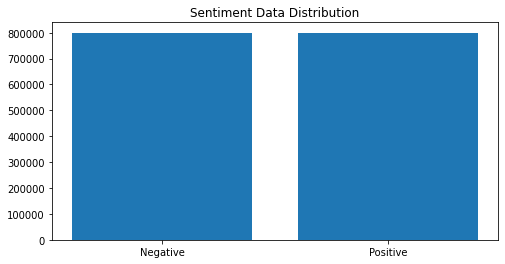

In [ ]:
val_count = twitter_df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [ ]:
import random
random_idx_list = [random.randint(1,len(twitter_df.text)) for i in range(10)] # creates random indexes to choose from dataframe
twitter_df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,sentiment,text
686179,Negative,Fighting with Windows Batch Scripts...
276218,Negative,@KaarinE Shortage of DPS or shortage of knowin...
928751,Positive,reading seventeen. then sleep.
1058702,Positive,"@fodorstravel Any Nantucket beach, any day ht..."
33630,Negative,Tous les hï¿½bergements sont mysql
1056542,Positive,"@ooomz Thanks for following, you're my 300th f..."
1008733,Positive,Good morning ! another lovely sunny day; back ...
360600,Negative,wow just gettin 2tha Gym was up stupid L8
137551,Negative,@rolytaylor i suppose it's little consolation ...
106781,Negative,Just got out of work only made 67 bucks


##**Text Preprocessing**

In [ ]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [ ]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [ ]:
twitter_df.text = twitter_df.text.apply(lambda x: preprocess(x))

##**Positive and Negative Words**

###**Positive Words**

In [ ]:
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS

In [ ]:
#from wordcloud import WordCloud

#plt.figure(figsize = (20,20)) 
#wc = WordCloud(max_words = 20 , width = 1600 , height = 800).generate(" ".join(twitter_df[twitter_df.sentiment == 'Positive'].text))
#plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
twitter_df_positive = twitter_df[twitter_df.sentiment == "Positive"].squeeze() #I use the squeeze method to convert it into a series, else the next line doesnt work

In [ ]:
all_text = ' '.join(twitter_df_positive['text'].str.lower())

In [ ]:
#WordCloud
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS

stopwords = STOPWORDS
stopwords.add('quot')

wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_text)

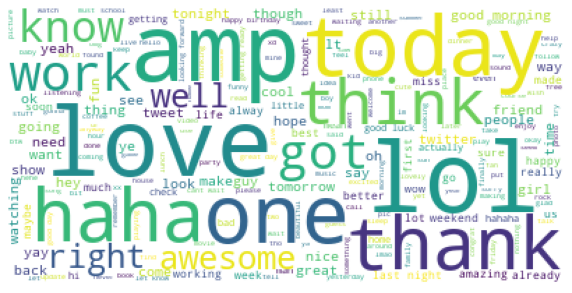

In [ ]:
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
filtered_words = [word for word in all_text.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(100):
    words.append(letter)
    counts.append(count)

In [ ]:
twitter_word_count_positive = pd.DataFrame(list(zip(words, counts)), columns =['word', 'count'])
twitter_word_count_positive.sort_values(by='count', ascending=False, na_position='first')
twitter_word_count_positive #THIS IS USEFUL

,word,count
0,good,62119
1,love,47713
2,day,47211
3,lol,36127
4,thanks,34515
...,...,...
95,finally,7882
96,made,7881
97,ready,7843
98,pretty,7812


<BarContainer object of 100 artists>

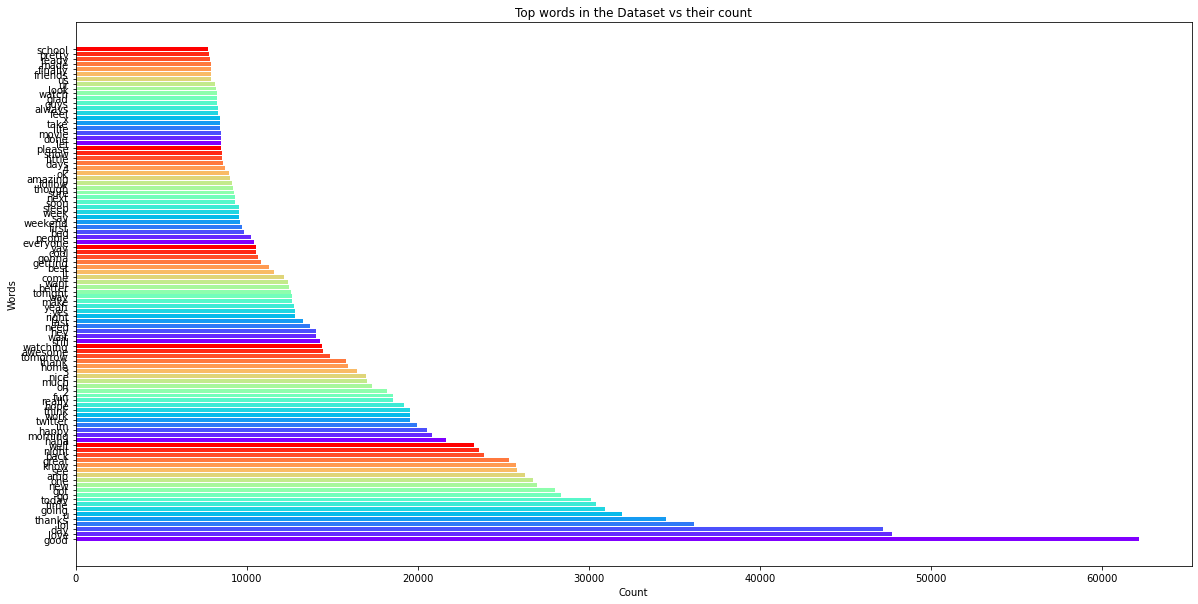

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, 20))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the Dataset vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

###**Negative Words**

In [ ]:
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS

In [ ]:
#from wordcloud import WordCloud

#plt.figure(figsize = (20,20)) 
#wc = WordCloud(max_words = 20 , width = 1600 , height = 800).generate(" ".join(twitter_df[twitter_df.sentiment == 'Positive'].text))
#plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
twitter_df_negative = twitter_df[twitter_df.sentiment == "Negative"].squeeze() #I use the squeeze method to convert it into a series, else the next line doesnt work

In [ ]:
all_text = ' '.join(twitter_df_negative['text'].str.lower())

In [ ]:
#WordCloud
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS

stopwords = STOPWORDS
stopwords.add('quot')

wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_text)

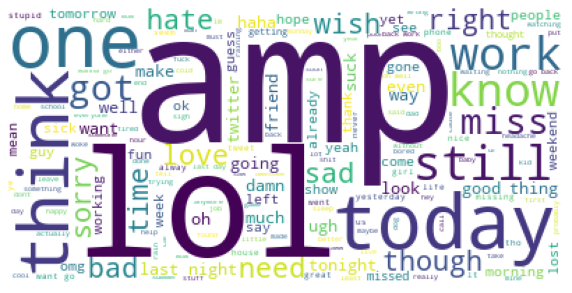

In [ ]:
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
filtered_words = [word for word in all_text.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(100):
    words.append(letter)
    counts.append(count)

In [ ]:
twitter_word_count_negative = pd.DataFrame(list(zip(words, counts)), columns =['word', 'count'])
twitter_word_count_negative.sort_values(by='count', ascending=False, na_position='first')
twitter_word_count_negative #THIS IS USEFUL

,word,count
0,go,45580
1,work,45427
2,day,39865
3,today,38118
4,going,33685
...,...,...
95,please,8044
96,trying,8016
97,man,7882
98,went,7845


<BarContainer object of 100 artists>

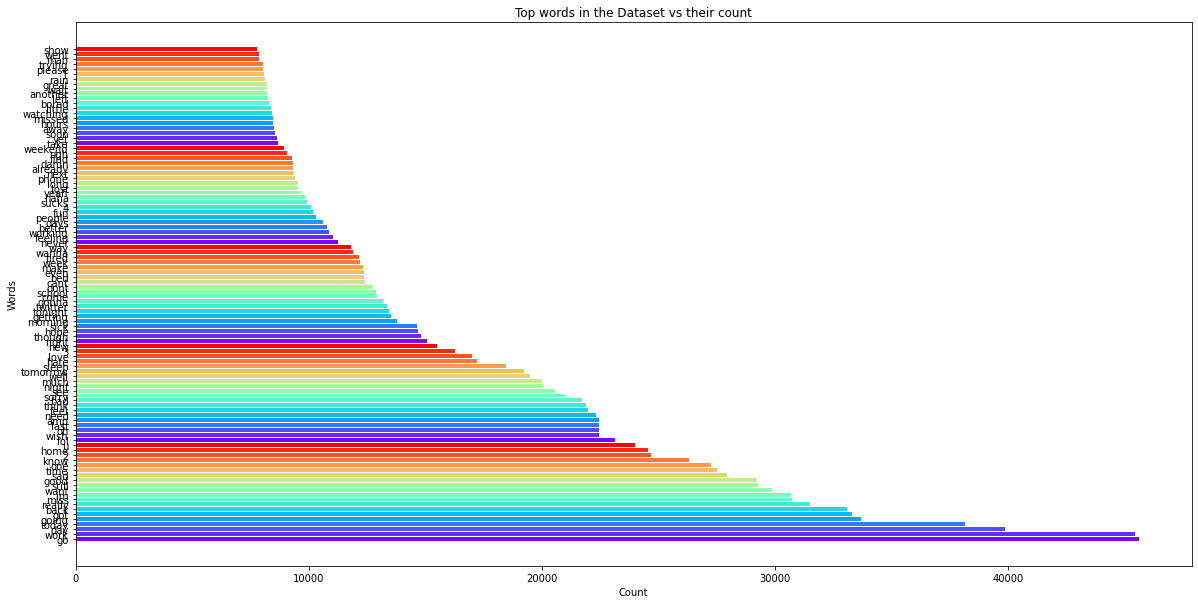

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, 20))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the Dataset vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

##**Train and Test Split**

In [ ]:
TRAIN_SIZE = 0.28125 #0.8 #CHANGE
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [ ]:
twitter_train_data, twitter_test_data = train_test_split(twitter_df, train_size=0.28125 , test_size=0.0625, random_state=7) # Splits Dataset into Training and Testing set #CHANGE
print("Train Data size:", len(twitter_train_data))
print("Test Data size", len(twitter_test_data))

In [ ]:
twitter_train_data.head(10)

##**Tokenization**

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(twitter_train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

In [ ]:
from keras.preprocessing.sequence import pad_sequences

twitter_x_train = pad_sequences(tokenizer.texts_to_sequences(twitter_train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
twitter_x_test = pad_sequences(tokenizer.texts_to_sequences(twitter_test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",twitter_x_train.shape)
print("Testing X Shape:",twitter_x_test.shape)

In [ ]:
labels = twitter_train_data.sentiment.unique().tolist()

###**Label Encoding**

In [ ]:
encoder = LabelEncoder()
encoder.fit(twitter_train_data.sentiment.to_list())

twitter_y_train = encoder.transform(twitter_train_data.sentiment.to_list())
twitter_y_test = encoder.transform(twitter_test_data.sentiment.to_list())

twitter_y_train = twitter_y_train.reshape(-1,1)
twitter_y_test = twitter_y_test.reshape(-1,1)

print("y_train shape:", twitter_y_train.shape)
print("y_test shape:",twitter_y_test.shape)

##**Word Emdedding**

In [1]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove.6B.zip

In [2]:
GLOVE_EMB = 'gdrive/My Drive/Datasets/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 2 #I reduce this one, else it takes on forever
MODEL_PATH = '.../output/kaggle/working/best_model.hdf5' #when is this one used???

In [ ]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

In [ ]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

##**Model Training**

###**Sequence Model**

In [ ]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model_twitter = tf.keras.Model(sequence_input, outputs)

###**Optimization Algorithm**

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model_twitter.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [ ]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

In [ ]:
history = model_twitter.fit(twitter_x_train, twitter_y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(twitter_x_test, twitter_y_test), callbacks=[ReduceLROnPlateau])

##**Model Evaluation**

In [ ]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [ ]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores_twitter = model_twitter.predict(twitter_x_test, verbose=1, batch_size=10000)
y_pred_1d_twitter = [decode_sentiment(score) for score in scores_twitter]

###**Confusion Matrix**

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

In [ ]:
cnf_matrix = confusion_matrix(twitter_test_data.sentiment.to_list(), y_pred_1d_twitter)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=twitter_test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

###**Classification Scores**

In [ ]:
print(classification_report(list(twitter_test_data.sentiment), y_pred_1d_twitter))

#**2) Fine Food Reviews Text Classification using LSTM**

(Amazon Fine Food Reviews): https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews (568453 rows)

##**Importing dependencies**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import re

print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.8.2


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##**Dataset Preprocessing**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
food_df = pd.read_csv('gdrive/My Drive/Datasets/FineFoodReviews.csv', encoding = 'latin')
food_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
food_df.columns = ["Id",	"ProductId",	"UserId",	"ProfileName",	"HelpfulnessNumerator",	"HelpfulnessDenominator",	"sentiment",	"Time", "Summary",	"text"]
food_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,sentiment,Time,Summary,text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
food_df = food_df.drop(['Id', 'ProductId', 'UserId', "ProfileName",	"HelpfulnessNumerator",	"HelpfulnessDenominator", "Time",	"Summary"], axis=1)
food_df

,sentiment,text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...
...,...,...
568449,5,Great for sesame chicken..this is a good if no...
568450,2,I'm disappointed with the flavor. The chocolat...
568451,5,"These stars are small, so you can give 10-15 o..."
568452,5,These are the BEST treats for training and rew...


In [ ]:
food_df.sentiment.unique()

array([5, 1, 4, 2, 3])

In [ ]:
lab_to_sentiment = {1:"Negative", 2:"Negative", 3:"Negative", 4:"Positive", 5:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
food_df.sentiment = food_df.sentiment.apply(lambda x: label_decoder(x))
food_df.head()

,sentiment,text
0,Positive,I have bought several of the Vitality canned d...
1,Negative,Product arrived labeled as Jumbo Salted Peanut...
2,Positive,This is a confection that has been around a fe...
3,Negative,If you are looking for the secret ingredient i...
4,Positive,Great taffy at a great price. There was a wid...


Text(0.5, 1.0, 'Sentiment Data Distribution')

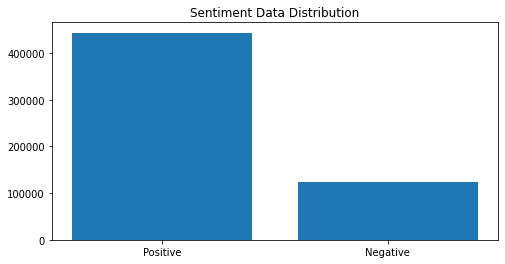

In [ ]:
val_count = food_df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [ ]:
import random
random_idx_list = [random.randint(1,len(food_df.text)) for i in range(10)] # creates random indexes to choose from dataframe
food_df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,sentiment,text
12745,Positive,The Nutiva hemp shakes have the best texture a...
315431,Positive,Our adopted Jack Russells have had eating prob...
217102,Positive,I was so glad to find Pero Breakfast beverage....
293953,Positive,I purchased this item a month ago and i drink ...
195707,Positive,This is excellent tea.. I'm glad it's organic...
141940,Negative,Because your baseline tastes may well differ f...
301068,Positive,"Hey, for instant coffee it's expensive but it ..."
249100,Positive,"The service is great,you receive it before tim..."
350303,Positive,This is an amazing biscuit! My all time favori...
370006,Negative,They are soft and don't crumble but do not tas...


##**Text Preprocessing**

In [ ]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [ ]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [ ]:
food_df.text = food_df.text.apply(lambda x: preprocess(x))

##**Positive and Negative Words**

###**Positive Words**

In [ ]:
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS

In [ ]:
#from wordcloud import WordCloud

#plt.figure(figsize = (20,20)) 
#wc = WordCloud(max_words = 20 , width = 1600 , height = 800).generate(" ".join(twitter_df[twitter_df.sentiment == 'Positive'].text))
#plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
food_df_positive = food_df[food_df.sentiment == "Positive"].squeeze() #I use the squeeze method to convert it into a series, else the next line doesnt work

In [ ]:
all_text = ' '.join(food_df_positive['text'].str.lower())

In [ ]:
#WordCloud
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS

stopwords = STOPWORDS
stopwords.add('quot')

wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_text)

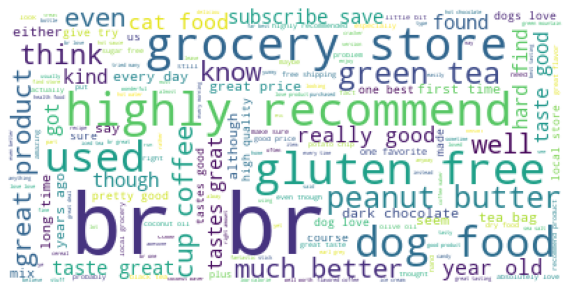

In [ ]:
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
filtered_words = [word for word in all_text.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(100):
    words.append(letter)
    counts.append(count)

In [ ]:
food_word_count_positive = pd.DataFrame(list(zip(words, counts)), columns =['word', 'count'])
food_word_count_positive.sort_values(by='count', ascending=False, na_position='first')
food_word_count_positive #THIS IS USEFUL

,word,count
0,br,475115
1,good,160197
2,great,150634
3,one,133932
4,coffee,125759
...,...,...
95,less,26418
96,say,26206
97,treat,25844
98,need,25718


<BarContainer object of 100 artists>

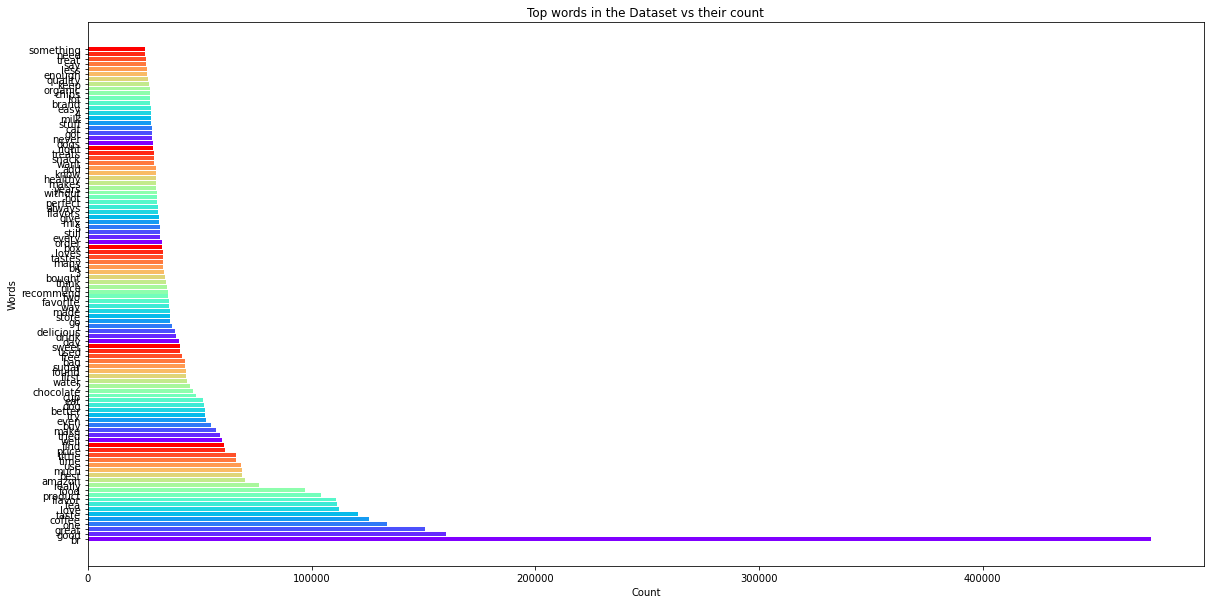

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, 20))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the Dataset vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

###**Negative Words**

In [ ]:
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS

In [ ]:
#from wordcloud import WordCloud

#plt.figure(figsize = (20,20)) 
#wc = WordCloud(max_words = 20 , width = 1600 , height = 800).generate(" ".join(twitter_df[twitter_df.sentiment == 'Positive'].text))
#plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
food_df_negative = food_df[food_df.sentiment == "Negative"].squeeze() #I use the squeeze method to convert it into a series, else the next line doesnt work

In [ ]:
all_text = ' '.join(food_df_negative['text'].str.lower())

In [ ]:
#WordCloud
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS

stopwords = STOPWORDS
stopwords.add('quot')

wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_text)

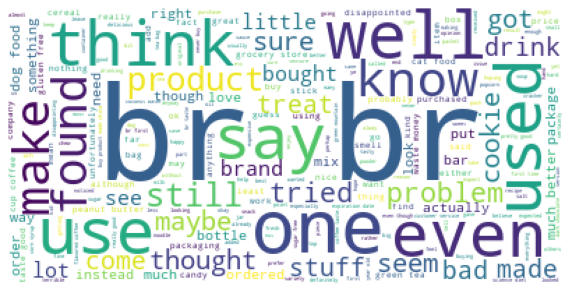

In [ ]:
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
filtered_words = [word for word in all_text.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(100):
    words.append(letter)
    counts.append(count)

In [ ]:
food_word_count_negative = pd.DataFrame(list(zip(words, counts)), columns =['word', 'count'])
food_word_count_negative.sort_values(by='count', ascending=False, na_position='first')
food_word_count_negative #THIS IS USEFUL

,word,count
0,br,171812
1,taste,51863
2,product,47555
3,one,42934
4,coffee,40738
...,...,...
95,hard,8005
96,bags,8004
97,another,8004
98,best,7948


<BarContainer object of 100 artists>

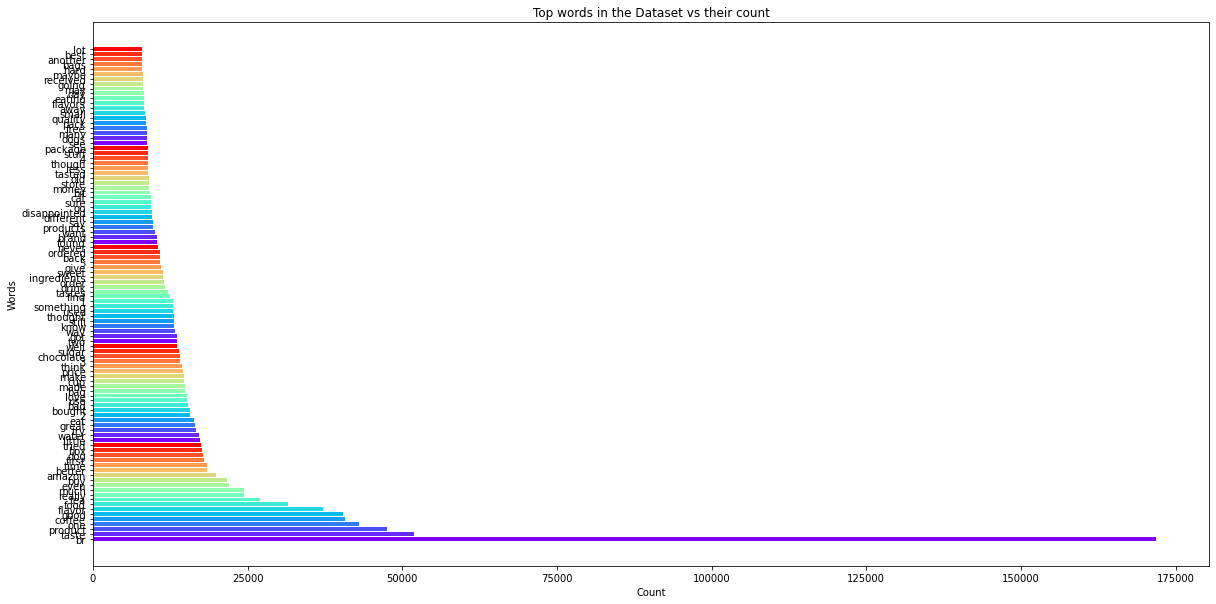

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, 20))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the Dataset vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

##**Train and Test Split**

In [ ]:
TRAIN_SIZE = 0.791622174569 #0.8 #CHANGE
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [ ]:
food_train_data, food_test_data = train_test_split(food_df, train_size=0.791622174569 , test_size=0.175915, random_state=7) # Splits Dataset into Training and Testing set #CHANGE
print("Train Data size:", len(food_train_data))
print("Test Data size", len(food_test_data))

In [ ]:
food_train_data.head(10)

##**Tokenization**

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(food_train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

In [ ]:
from keras.preprocessing.sequence import pad_sequences

food_x_train = pad_sequences(tokenizer.texts_to_sequences(food_train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
food_x_test = pad_sequences(tokenizer.texts_to_sequences(food_test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",food_x_train.shape)
print("Testing X Shape:",food_x_test.shape)

In [ ]:
labels = food_train_data.sentiment.unique().tolist()

###**Label Encoding**

In [ ]:
encoder = LabelEncoder()
encoder.fit(food_train_data.sentiment.to_list())

food_y_train = encoder.transform(food_train_data.sentiment.to_list())
food_y_test = encoder.transform(food_test_data.sentiment.to_list())

food_y_train = food_y_train.reshape(-1,1)
food_y_test = food_y_test.reshape(-1,1)

print("y_train shape:", food_y_train.shape)
print("y_test shape:", food_y_test.shape)

##**Word Emdedding**

In [ ]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove.6B.zip

In [ ]:
GLOVE_EMB = 'gdrive/My Drive/Datasets/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 2 #I reduce this one, else it takes on forever
MODEL_PATH = '.../output/kaggle/working/best_model.hdf5' #when is this one used???

In [ ]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

In [ ]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

##**Model Training**

###**Sequence Model**

In [ ]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model_food = tf.keras.Model(sequence_input, outputs)

###**Optimization Algorithm**

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model_food.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [ ]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

In [ ]:
history = model_food.fit(food_x_train, food_y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(food_x_test, food_y_test), callbacks=[ReduceLROnPlateau])

##**Model Evaluation**

In [ ]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [ ]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores_food = model_food.predict(food_x_test, verbose=1, batch_size=10000)
y_pred_1d_food = [decode_sentiment(score) for score in scores_food]

###**Confusion Matrix**

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

In [ ]:
cnf_matrix = confusion_matrix(food_test_data.sentiment.to_list(), y_pred_1d_food)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=food_test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

###**Classification Scores**

In [ ]:
print(classification_report(list(food_test_data.sentiment), y_pred_1d_food))

#**3) Kindle Book Reviews Text Classification using LSTM**

(Amazon Kindle Book Review for Sentiment Analysis):https://www.kaggle.com/datasets/meetnagadia/amazon-kindle-book-review-for-sentiment-analysis

##**Importing dependencies**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import re

print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.8.2


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##**Dataset Preprocessing**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('gdrive/My Drive/Datasets/all_kindle_review .csv', encoding = 'latin')
df.head()

,Unnamed: 0,Unnamed: 0.1,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


In [ ]:
df.columns = ['0', '0.1', 'asin', 'helpful', "sentiment", "text", "reviewTime", "reviewerID", "reviewerName", "summary", "unixReviewTime"]
df.head()

,0,0.1,asin,helpful,sentiment,text,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


In [ ]:
df = df.drop(['0', '0.1', 'asin', 'helpful', "reviewTime", "reviewerID", "reviewerName", "summary", "unixReviewTime"], axis=1)
df

,sentiment,text
0,3,"Jace Rankin may be short, but he's nothing to ..."
1,5,Great short read. I didn't want to put it dow...
2,3,I'll start by saying this is the first of four...
3,3,Aggie is Angela Lansbury who carries pocketboo...
4,4,I did not expect this type of book to be in li...
...,...,...
11995,4,Valentine cupid is a vampire- Jena and Ian ano...
11996,5,I have read all seven books in this series. Ap...
11997,3,This book really just wasn't my cuppa. The si...
11998,1,"tried to use it to charge my kindle, it didn't..."


In [ ]:
df.sentiment.unique()

array([3, 5, 4, 2, 1])

In [ ]:
lab_to_sentiment = {1:"Negative", 2:"Negative", 3:"Negative", 4:"Positive", 5:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df.head()

,sentiment,text
0,Negative,"Jace Rankin may be short, but he's nothing to ..."
1,Positive,Great short read. I didn't want to put it dow...
2,Negative,I'll start by saying this is the first of four...
3,Negative,Aggie is Angela Lansbury who carries pocketboo...
4,Positive,I did not expect this type of book to be in li...


Text(0.5, 1.0, 'Sentiment Data Distribution')

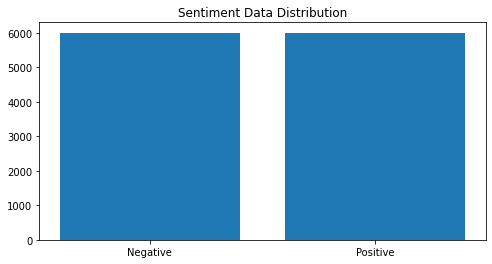

In [ ]:
val_count = df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [ ]:
import random
random_idx_list = [random.randint(1,len(df.text)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,sentiment,text
4117,Negative,This wasn't a bad read but I have a few buts. ...
9564,Negative,This is the first book I read by Sami Lee. It'...
4318,Negative,First time I had read a book by SCrayton. Was...
7429,Negative,This book had a great story line however it la...
11337,Negative,This is the first time I have ever given a boo...
2768,Negative,second free book I've chosen that was not proo...
11466,Negative,"Here we have a great premise for a series, wit..."
8121,Negative,MJD's writing has gradually become erratic and...
10242,Negative,I bought this book by accident but was like wh...
8259,Negative,"Horrible, plastic characters. I know we are su..."


##**Text Preprocessing**

In [ ]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [ ]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [ ]:
df.text = df.text.apply(lambda x: preprocess(x))

##**Positive and Negative Words**

###**Positive Words**

In [ ]:
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS

In [ ]:
#from wordcloud import WordCloud

#plt.figure(figsize = (20,20)) 
#wc = WordCloud(max_words = 20 , width = 1600 , height = 800).generate(" ".join(twitter_df[twitter_df.sentiment == 'Positive'].text))
#plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
df_positive = df[df.sentiment == "Positive"].squeeze() #I use the squeeze method to convert it into a series, else the next line doesnt work

In [ ]:
all_text = ' '.join(df_positive['text'].str.lower())

In [ ]:
#WordCloud
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS

stopwords = STOPWORDS
stopwords.add('quot')

wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_text)

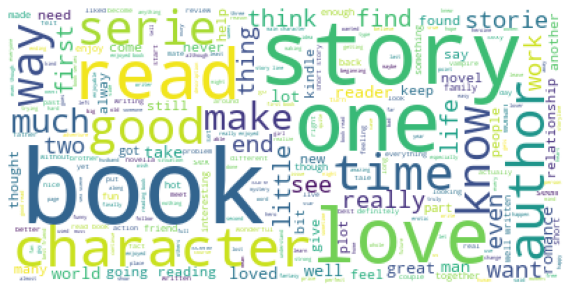

In [ ]:
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
filtered_words = [word for word in all_text.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(100):
    words.append(letter)
    counts.append(count)

In [ ]:
kindle_word_count_positive = pd.DataFrame(list(zip(words, counts)), columns =['word', 'count'])
kindle_word_count_positive.sort_values(by='count', ascending=False, na_position='first')
kindle_word_count_positive #THIS IS USEFUL

,word,count
0,book,5555
1,story,4640
2,read,4508
3,one,3001
4,love,2345
...,...,...
95,come,403
96,part,402
97,nice,402
98,makes,398


<BarContainer object of 100 artists>

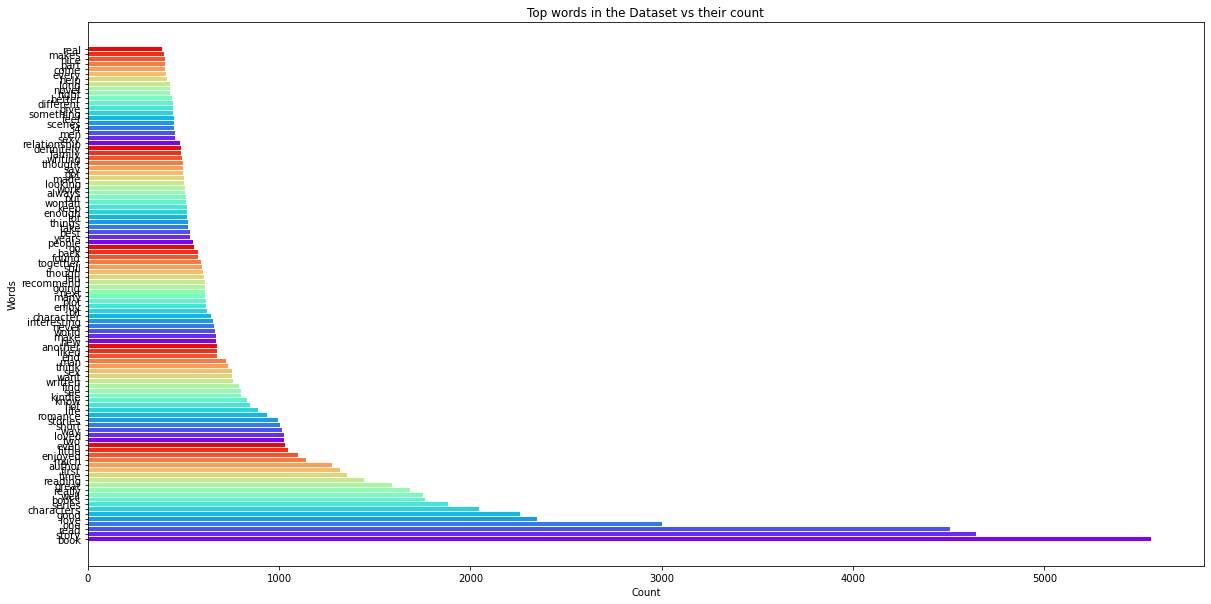

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, 20))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the Dataset vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

###**Negative Words**

In [ ]:
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS

In [ ]:
#from wordcloud import WordCloud

#plt.figure(figsize = (20,20)) 
#wc = WordCloud(max_words = 20 , width = 1600 , height = 800).generate(" ".join(twitter_df[twitter_df.sentiment == 'Positive'].text))
#plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
df_negative = df[df.sentiment == "Negative"].squeeze() #I use the squeeze method to convert it into a series, else the next line doesnt work

In [ ]:
all_text = ' '.join(df_negative['text'].str.lower())

In [ ]:
#WordCloud
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS

stopwords = STOPWORDS
stopwords.add('quot')

wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_text)

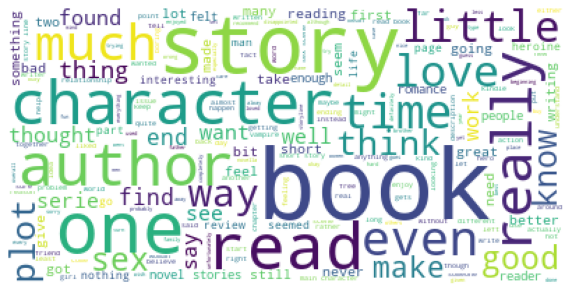

In [ ]:
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
filtered_words = [word for word in all_text.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(100):
    words.append(letter)
    counts.append(count)

In [ ]:
kindle_word_count_negative = pd.DataFrame(list(zip(words, counts)), columns =['word', 'count'])
kindle_word_count_negative.sort_values(by='count', ascending=False, na_position='first')
kindle_word_count_negative #THIS IS USEFUL

,word,count
0,book,7210
1,story,5218
2,read,3599
3,one,2978
4,really,2203
...,...,...
95,enjoy,424
96,review,421
97,line,420
98,best,417


<BarContainer object of 100 artists>

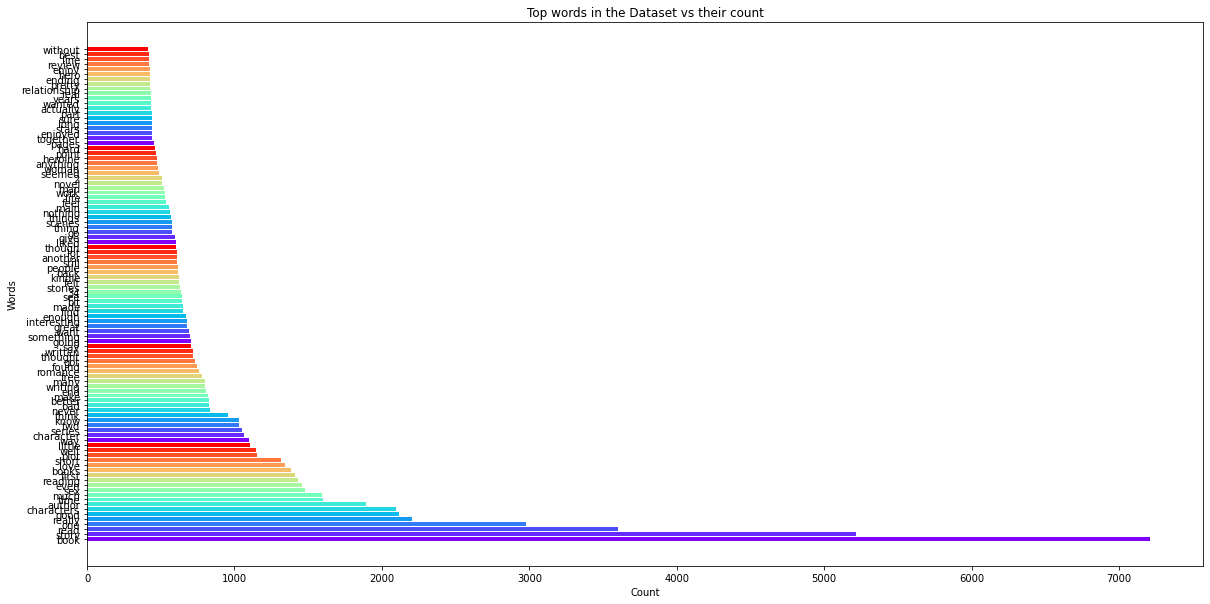

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, 20))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the Dataset vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

##**Train and Test Split**

In [ ]:
TRAIN_SIZE = 0.2 #0.8 #CHANGE
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [ ]:
kindle_train_data, kindle_test_data = train_test_split(df, train_size=0.8 , test_size=0.2, random_state=7) # Splits Dataset into Training and Testing set #CHANGE
print("Train Data size:", len(kindle_train_data))
print("Test Data size", len(kindle_test_data))

In [ ]:
kindle_train_data.head(10)

##**Tokenization**

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(kindle_train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

In [ ]:
from keras.preprocessing.sequence import pad_sequences

kindle_x_train = pad_sequences(tokenizer.texts_to_sequences(kindle_train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
kindle_x_test = pad_sequences(tokenizer.texts_to_sequences(kindle_test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",kindle_x_train.shape)
print("Testing X Shape:",kindle_x_test.shape)

In [ ]:
labels = kindle_train_data.sentiment.unique().tolist()

###**Label Encoding**

In [ ]:
encoder = LabelEncoder()
encoder.fit(kindle_train_data.sentiment.to_list())

kindle_y_train = encoder.transform(kindle_train_data.sentiment.to_list())
kindle_y_test = encoder.transform(kindle_test_data.sentiment.to_list())

kindle_y_train = kindle_y_train.reshape(-1,1)
kindle_y_test = kindle_y_test.reshape(-1,1)

print("y_train shape:", kindle_y_train.shape)
print("y_test shape:", kindle_y_test.shape)

##**Word Emdedding**

In [ ]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove.6B.zip

In [ ]:
GLOVE_EMB = 'gdrive/My Drive/Datasets/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 2 #I reduce this one, else it takes on forever
MODEL_PATH = '.../output/kaggle/working/best_model.hdf5' #when is this one used???

In [ ]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

In [ ]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

##**Model Training**

###**Sequence Model**

In [ ]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model_kindle = tf.keras.Model(sequence_input, outputs)

###**Optimization Algorithm**

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model_kindle.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [ ]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

In [ ]:
history = model_kindle.fit(kindle_x_train, kindle_y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(kindle_x_test, kindle_y_test), callbacks=[ReduceLROnPlateau])

In [ ]:
len(kindle_train_data)

##**Model Evaluation**

In [ ]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [ ]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores_kindle = model_kindle.predict(kindle_x_test, verbose=1, batch_size=10000)
y_pred_1d_kindle = [decode_sentiment(score) for score in scores_kindle]

###**Confusion Matrix**

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

In [ ]:
cnf_matrix = confusion_matrix(kindle_test_data.sentiment.to_list(), y_pred_1d_kindle)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=kindle_test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

###**Classification Scores**

In [ ]:
print(classification_report(list(kindle_test_data.sentiment), y_pred_1d_kindle))

#**4) Scores of other models**

**Disclaimer: These take very long to execute and the results are already included in the presentation, may skip these to save time**

###**Score Comparison other Models trained by Twitter training data set** 

In [ ]:
#Comparing Results to other models for classification 

In [ ]:
modelo = LogisticRegression(C=2)
modelo.fit(twitter_x_train, twitter_y_train)
print("Logistic Regression Accuracy de train (twitter dataset):", modelo.score(twitter_x_train, twitter_y_train))
print("Logistic Regression Accuracy de test (twitter dataset):", modelo.score(twitter_x_test, twitter_y_test))

print("Regression Model trained by twitter ds. scores (fine food reviews test dataset):", modelo.score(food_x_test, food_y_test))
print("Regression Model trained by twitter ds. scores (kindle reviews test dataset):", modelo.score(kindle_x_test, kindle_y_test))


In [ ]:

model = DecisionTreeClassifier(criterion='entropy',  max_features='sqrt', max_depth=300, max_leaf_nodes=600)
model.fit(twitter_x_train, twitter_y_train)
print("DecisionTreeClassifier Accuracy de train(twitter dataset):", model.score(twitter_x_train, twitter_y_train))
print("DecisionTreeClassifier Accuracy de test(twitterdata):", model.score(twitter_x_test, twitter_y_test))

print("DecisionTreeClassifier trained by twitter ds. scores (fine food reviews test dataset):", model.score(food_x_test, food_y_test))
print("DecisionTreeClassifier trained by twitter ds. scores (kindle reviews test dataset):", model.score(kindle_x_test, kindle_y_test))


In [ ]:
forest = RandomForestClassifier(n_estimators=10, max_depth=50, max_features=25, random_state=0, n_jobs=-1)
forest.fit(twitter_x_train, twitter_y_train)
print("RandomForestClassifier: Accuracy on training set: {:.3f}".format(forest.score(twitter_x_train, twitter_y_train)))
print("RandomForestClassifier: Accuracy on test set: {:.3f}".format(forest.score(twitter_x_test, twitter_y_test)))

print("RandomForestClassifier trained by twitter ds. scores (fine food reviews test dataset):", forest.score(food_x_test, food_y_test))
print("RandomForestClassifier trained by twitter ds. scores (kindle reviews test dataset):", forest.score(kindle_x_test, kindle_y_test))


In [ ]:
forest2 = RandomForestClassifier(n_estimators=50, max_depth=50, max_features=25, random_state=0, n_jobs=-1)
forest2.fit(twitter_x_train, twitter_y_train)
print("RandomForest Classifier with n_e. = 100: Accuracy on training set: {:.3f}".format(forest2.score(twitter_x_train, twitter_y_train)))
print("RandomForest Classifier with n_e. = 100: Accuracy on test set: {:.3f}".format(forest2.score(twitter_x_test, twitter_y_test)))

print("RandomForestClassifier trained by twitter ds. scores (fine food reviews test dataset):", forest2.score(food_x_test, food_y_test))
print("RandomForestClassifier trained by twitter ds. scores (kindle reviews test dataset):", forest2.score(kindle_x_test, kindle_y_test))


In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, n_estimators=50,max_depth=20)
gbrt.fit(twitter_x_train, twitter_y_train)
print("GradientBoostingCLassifier: Accuracy on training set: {:.3f}".format(gbrt.score(twitter_x_train, twitter_y_train)))
print("GradientBoostingCLassifier: Accuracy on test set: {:.3f}".format(gbrt.score(twitter_x_test, twitter_y_test)))

print("GradientBoostingClassifier trained by twitter ds. scores (fine food reviews test dataset):", gbrt.score(food_x_test, food_y_test))
print("GradientBoostingClassifier trained by twitter ds. scores (Kindle review test dataset):", gbrt.score(kindle_x_test, kindle_y_test))


###**Score Comparison other Models trained by Fine Food reviews training data set**

In [ ]:
modelo2 = LogisticRegression(C=2)
modelo2.fit(food_x_train, food_y_train)
print("Logistic Regression Accuracy de train (fine food reviews data set):", modelo2.score(food_x_train, food_y_train))
print("Logistic Regression Accuracy de test (fine food reviews data set):", modelo2.score(food_x_test, food_y_test))

print("Regression Model trained by fine food ds. scores (twitter test dataset):", modelo2.score(twitter_x_test, twitter_y_test))
print("Regression Model trained by fine food ds. scores (kindle test dataset):", modelo2.score(kindle_x_test, kindle_y_test))


In [ ]:
model2 = DecisionTreeClassifier(criterion='entropy',  max_features='sqrt', max_depth=300, max_leaf_nodes=600)
model2.fit(food_x_train, food_y_train)
print("DecisionTreeClassifier Accuracy de train(food dataset):", model2.score(food_x_train, food_y_train))
print("DecisionTreeClassifier Accuracy de test(food data):", model2.score(food_x_test, food_y_test))

print("DecisionTreeClassifier trained by fine food ds. scores twitter test dataset:", model2.score(twitter_x_test, twitter_y_test))
print("DecisionTreeClassifier trained by fine food ds. scores kindle reviews test dataset:", model2.score(kindle_x_test, kindle_y_test))

In [ ]:
forest21 = RandomForestClassifier(n_estimators=10, max_depth=50, max_features=25, random_state=0, n_jobs=-1)
forest21.fit(food_x_train, food_y_train)
print("RandomForestClassifier: Accuracy on training set: {:.3f}".format(forest21.score(food_x_train, food_y_train)))
print("RandomForestClassifier: Accuracy on test set: {:.3f}".format(forest21.score(food_x_test, food_y_test)))

print("RandomForestClassifier trained by fine food ds. scores (twitter reviews test dataset):", forest21.score(twitter_x_test, twitter_y_test))
print("RandomForestClassifier trained by fine food ds. scores (kindle reviews test dataset):", forest21.score(kindle_x_test, kindle_y_test))

In [ ]:
forest22 = RandomForestClassifier(n_estimators=50, max_depth=50, max_features=25, random_state=0, n_jobs=-1)
forest22.fit(food_x_train, food_y_train)
print("RandomForest Classifier with n_e. = 100: Accuracy on training set: {:.3f}".format(forest22.score(food_x_train, food_y_train)))
print("RandomForest Classifier with n_e. = 100: Accuracy on test set: {:.3f}".format(forest22.score(food_x_test, food_y_test)))

print("RandomForestClassifier trained by twitter ds. scores (twitter test dataset):", forest22.score(twitter_x_test, twitter_y_test))
print("RandomForestClassifier trained by twitter ds. scores (kindle reviews test dataset):", forest22.score(kindle_x_test, kindle_y_test))


In [ ]:
gbrt2 = GradientBoostingClassifier(random_state=0, n_estimators=50,max_depth=20)
gbrt2.fit(food_x_train, food_y_train)
print("GradientBoostingCLassifier: Accuracy on training set: {:.3f}".format(gbrt2.score(food_x_train, food_y_train)))
print("GradientBoostingCLassifier: Accuracy on test set: {:.3f}".format(gbrt2.score(food_x_test, food_y_test)))

print("GradientBoostingClassifier trained by fine food ds. scores (twitter reviews test dataset):", gbrt2.score(twitter_x_test, twitter_y_test))
print("GradientBoostingClassifier trained by fine food ds. scores (Kindle review test dataset):", gbrt2.score(kindle_x_test, kindle_y_test))


###**Score Comparison other Models trained by Kindle Book reviews training data set**

In [ ]:
modelo3 = LogisticRegression(C=2)
modelo3.fit(kindle_x_train, kindle_y_train)
print("Logistic Regression Accuracy de train (fine food reviews data set):", modelo3.score(kindle_x_train, kindle_y_train))
print("Logistic Regression Accuracy de test (fine food reviews data set):", modelo3.score(kindle_x_test, kindle_y_test))

print("Regression Model trained by kindle ds. scores (twitter test dataset):", modelo3.score(twitter_x_test, twitter_y_test))
print("Regression Model trained by kindle ds. scores (fine food test dataset):", modelo3.score(food_x_test, food_y_test))


In [ ]:
model3 = DecisionTreeClassifier(criterion='entropy',  max_features='sqrt', max_depth=300, max_leaf_nodes=600)
model3.fit(kindle_x_train, kindle_y_train)
print("DecisionTreeClassifier Accuracy de train(food dataset):", model3.score(kindle_x_train, kindle_y_train))
print("DecisionTreeClassifier Accuracy de test(food data):", model3.score(kindle_x_test, kindle_y_test))

print("DecisionTreeClassifier trained by kindle ds. scores (twitter reviews test dataset):", model3.score(twitter_x_test, twitter_y_test))
print("DecisionTreeClassifier trained by kindle ds. scores (fine food reviews test dataset):", model3.score(food_x_test, food_y_test))

In [ ]:
forest31 = RandomForestClassifier(n_estimators=10, max_depth=50, max_features=25, random_state=0, n_jobs=-1)
forest31.fit(kindle_x_train, kindle_y_train)
print("RandomForestClassifier: Accuracy on training set: {:.3f}".format(forest31.score(kindle_x_train, kindle_y_train)))
print("RandomForestClassifier: Accuracy on test set: {:.3f}".format(forest31.score(kindle_x_test, kindle_y_test)))

print("RandomForestClassifier trained by kindle ds. scores (twitter reviews test dataset):", forest31.score(twitter_x_test, twitter_y_test))
print("RandomForestClassifier trained by kindle ds. scores (fine food test dataset):", forest31.score(kindle_x_test, kindle_y_test))

In [ ]:
forest32 = RandomForestClassifier(n_estimators=50, max_depth=50, max_features=25, random_state=0, n_jobs=-1)
forest32.fit(kindle_x_train, kindle_y_train)
print("RandomForest Classifier with n_e. = 100: Accuracy on training set: {:.3f}".format(forest32.score(kindle_x_train, kindle_y_train)))
print("RandomForest Classifier with n_e. = 100: Accuracy on test set: {:.3f}".format(forest32.score(kindle_x_test, kindle_y_test)))

print("RandomForestClassifier trained by kindle ds. scores (twitter test dataset):", forest32.score(twitter_x_test, twitter_y_test))
print("RandomForestClassifier trained by kindle ds. scores (fine food rewies test dataset):", forest32.score(food_x_test, food_y_test))


In [ ]:
gbrt3 = GradientBoostingClassifier(random_state=0, n_estimators=50,max_depth=20)
gbrt3.fit(kindle_x_train, kindle_y_train)
print("GradientBoostingCLassifier: Accuracy on training set: {:.3f}".format(gbrt3.score(kindle_x_train, kindle_y_train)))
print("GradientBoostingCLassifier: Accuracy on test set: {:.3f}".format(gbrt3.score(kindle_x_test, kindle_y_test)))

print("GradientBoostingClassifier trained by kindle ds. scores (twitter reviews test dataset):", gbrt3.score(twitter_x_test, twitter_y_test))
print("GradientBoostingClassifier trained by kindle ds. scores (fine food review test dataset):", gbrt3.score(food_x_test, food_y_test))


###**Cross scores of lstm**


In [ ]:
#Changing the size of the test data set of the kindle, food and twitter data set to prevent the model from crashing

#for some reason we had to antoher set of training and test set otherwise the kindle model would always crash when predicting
twitter_train_data_forCrash, twitter_test_data_forCrash = train_test_split(twitter_df, train_size=0.28125 , test_size=0.0625, random_state=7) # Splits Dataset into Training and Testing set #CHANGE
print("Train Data size:", len(twitter_train_data_forCrash))
print("Test Data size", len(twitter_test_data_forCrash))

twitter_x_train_forCrash = pad_sequences(tokenizer.texts_to_sequences(twitter_train_data_forCrash.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
twitter_x_test_forCrash = pad_sequences(tokenizer.texts_to_sequences(twitter_test_data_forCrash.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",twitter_x_train_forCrash.shape)
print("Testing X Shape:",twitter_x_test_forCrash.shape)

labels = twitter_train_data_forCrash.sentiment.unique().tolist()

encoder = LabelEncoder()
encoder.fit(twitter_train_data_forCrash.sentiment.to_list())

twitter_y_train_forCrash = encoder.transform(twitter_train_data_forCrash.sentiment.to_list())
twitter_y_test_forCrash = encoder.transform(twitter_test_data_forCrash.sentiment.to_list())

twitter_y_train_forCrash = twitter_y_train_forCrash.reshape(-1,1)
twitter_y_test_forCrahs = twitter_y_test_forCrash.reshape(-1,1)

print("y_train shape:", twitter_y_train_forCrash.shape)
print("y_test shape:", twitter_y_test_forCrahs.shape)

In [ ]:
food_train_data_forCrash, food_test_data_forCrash = train_test_split(food_df, train_size=0.791622174569 , test_size=0.175915, random_state=7) # Splits Dataset into Training and Testing set #CHANGE
print("Train Data size:", len(food_train_data_forCrash))
print("Test Data size", len(food_test_data_forCrash))

food_x_train_forCrash = pad_sequences(tokenizer.texts_to_sequences(food_train_data_forCrash.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
food_x_test_forCrash = pad_sequences(tokenizer.texts_to_sequences(food_test_data_forCrash.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",food_x_train_forCrash.shape)
print("Testing X Shape:",food_x_test_forCrash.shape)

labels = food_train_data_forCrash.sentiment.unique().tolist()

encoder = LabelEncoder()
encoder.fit(food_train_data_forCrash.sentiment.to_list())

food_y_train_forCrash = encoder.transform(food_train_data_forCrash.sentiment.to_list())
food_y_test_forCrash = encoder.transform(food_test_data_forCrash.sentiment.to_list())

food_y_train_forCrash = food_y_train_forCrash.reshape(-1,1)
food_y_test_forCrahs = food_y_test_forCrash.reshape(-1,1)

print("y_train shape:", food_y_train_forCrash.shape)
print("y_test shape:", food_y_test_forCrash.shape)

In [ ]:
print("test size: twitter, food, kindle")
print(len(twitter_x_test_forCrash))
print(len(food_x_test_forCrash))
print(len(kindle_x_test))
print("Training size: twitter, food, kindle")
print(len(twitter_x_train))
print(len(food_x_train))
print(len(kindle_x_train))

In [ ]:
#twitter model predicts kindle test set
scores_test = model_twitter.predict(kindle_x_test, verbose=1, batch_size=10000)
y_test = [decode_sentiment(score) for score in scores_test]
print(classification_report(list(kindle_test_data.sentiment), y_test))

cnf_matrix_tw = confusion_matrix(kindle_test_data.sentiment.to_list(), y_test)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix_tw, classes=kindle_test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

In [ ]:
#twitter model predicts fine food reviews
scores_test2 = model_twitter.predict(food_x_test_forCrash, verbose=1, batch_size=10000)
y_test2 = [decode_sentiment(score) for score in scores_test2]
print(classification_report(list(food_x_test_forCrash.sentiment), y_test2))

cnf_matrix_tw2 = confusion_matrix(kindle_test_data.sentiment.to_list(), y_test2)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix_tw, classes=kindle_test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

In [ ]:
#food model predicts twitter test set
scores_food_tw = model_food.predict(twitter_x_test_forCrash, verbose=1, batch_size=10000)
y_pred_2d = [decode_sentiment(score) for score in scores_food_tw]
print(classification_report(list(twitter_test_data_forCrash.sentiment), y_pred_2d))

cnf_matrix_tw = confusion_matrix(kindle_test_data.sentiment.to_list(), y_test)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix_tw, classes=kindle_test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

In [ ]:
#fine food model scores kindle 
scores_3 = model_food.predict(kindle_x_test, verbose=1, batch_size=10000)
y_3 = [decode_sentiment(score) for score in scores_3]
print(classification_report(list(kindle_test_data.sentiment), y_3))

cnf_matrix_tw = confusion_matrix(kindle_test_data.sentiment.to_list(), y_test)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix_tw, classes=kindle_test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

In [ ]:
# kindle model predicts the fine food reviews test set
score4 = model_kindle.predict(food_x_test_forCrash, verbose=1, batch_size=10000)
y_4 = [decode_sentiment(score) for score in score4]
print(classification_report(list(food_test_data_forCrash.sentiment), y_4))

cnf_matrix_tw = confusion_matrix(kindle_test_data.sentiment.to_list(), y_test)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix_tw, classes=kindle_test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

In [ ]:
# kindle model predicts the twitter test set
score5 = model_kindle.predict(twitter_x_test_forCrash, verbose=1, batch_size=10000)
y_5 = [decode_sentiment(score) for score in score5]
print(classification_report(list(twitter_test_data_forCrash.sentiment), y_5))

cnf_matrix_tw = confusion_matrix(kindle_test_data.sentiment.to_list(), y_test)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix_tw, classes=kindle_test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

###**Positive and Negative Words Dataframes**

In [ ]:
#Positive words
#first 2 columns: twitter
#Second 2 columns: foods
#Third 2 columns: kindle
twitter_word_count_positive.join(food_word_count_positive, lsuffix=' ', rsuffix=' ').join(kindle_word_count_positive, lsuffix=' ', rsuffix=' ')

,word,count,word,count,word,count
0,good,62119,br,475115,book,5555
1,love,47713,good,160197,story,4640
2,day,47211,great,150634,read,4508
3,lol,36127,one,133932,one,3001
4,thanks,34515,coffee,125759,love,2345
...,...,...,...,...,...,...
95,finally,7882,less,26418,come,403
96,made,7881,say,26206,part,402
97,ready,7843,treat,25844,nice,402
98,pretty,7812,need,25718,makes,398


In [ ]:
#Negative words
words_negative = pd.merge(twitter_word_count_negative, food_word_count_negative, kindle_word_count_negative)
words_negative

In [ ]:
#Negative words
#first 2 columns: twitter
#Second 2 columns: foods
#Third 2 columns: kindle
twitter_word_count_negative.join(food_word_count_negative, lsuffix=' ', rsuffix=' ').join(kindle_word_count_negative, lsuffix=' ', rsuffix=' ')

,word,count,word,count,word,count
0,go,45580,br,171812,book,7210
1,work,45427,taste,51863,story,5218
2,day,39865,product,47555,read,3599
3,today,38118,one,42934,one,2978
4,going,33685,coffee,40738,really,2203
...,...,...,...,...,...,...
95,please,8044,hard,8005,enjoy,424
96,trying,8016,bags,8004,review,421
97,man,7882,another,8004,line,420
98,went,7845,best,7948,best,417
